C:\Users\Administrator\AppData\Local\Temp\ipykernel_28208\3846887451.py:11: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  series = pd.read_csv(
c:\ProgramData\Anaconda3\envs\pytorch\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\ProgramData\Anaconda3\envs\pytorch\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\ProgramData\Anaconda3\envs\pytorch\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -199.651
Date:                Wed, 20 Sep 2023   AIC                            411.302
Time:                        09:52:54   BIC                            420.634
Sample:                    01-01-1991   HQIC                           414.523
                         - 12-01-1993                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8788      0.227     -3.876      0.000      -1.323      -0.434
ar.L2         -0.2787      0.232     -1.203      0.229      -0.733       0.176
ar.L3         -0.0076      0.270     -0.028      0.9

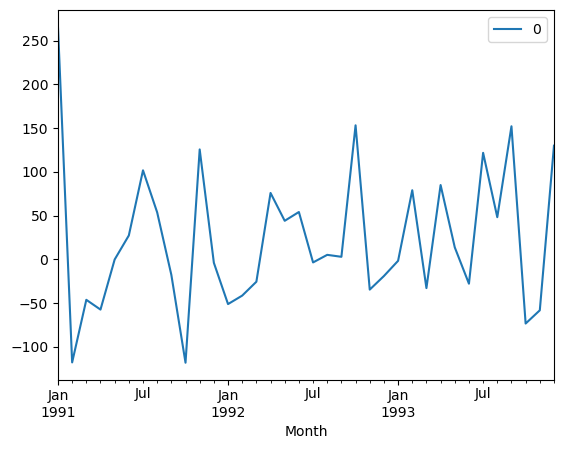

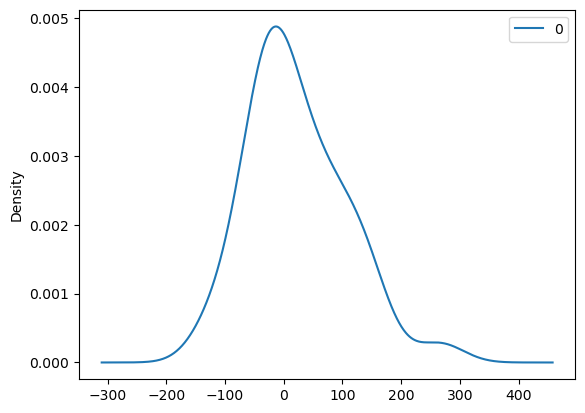

                0
count   36.000000
mean    22.459086
std     82.505331
min   -118.213281
25%    -33.308343
50%      1.361178
75%     76.704967
max    266.000000


In [2]:
import pandas as pd
from datetime import datetime
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt


def parser(x):
    return datetime.strptime("199" + x, "%Y-%m")


series = pd.read_csv(
    "data/sales.csv",
    header=0,
    parse_dates=[0],
    index_col=0,
    date_parser=parser,
)
model = ARIMA(series, order=(5, 1, 0))
model_fit = model.fit()
print(model_fit.summary())
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
residuals.plot(kind="kde")
plt.show()
print(residuals.describe())


predicted=352.85534142722986, expected=[346.3]
predicted=277.398035813572, expected=[329.7]
predicted=368.7537341869486, expected=[445.4]
predicted=331.7736344964164, expected=[325.9]
predicted=372.07044583771557, expected=[449.3]
predicted=360.0208723807273, expected=[411.3]
predicted=454.5262302431074, expected=[417.4]
predicted=388.6906963495425, expected=[545.5]
predicted=437.6324469330441, expected=[477.6]
predicted=516.4376239095869, expected=[687.]
predicted=520.9161905976498, expected=[435.3]
predicted=675.5946468307968, expected=[587.3]
predicted=505.2010157937026, expected=[676.9]
Test MSE: 9118.817893680225


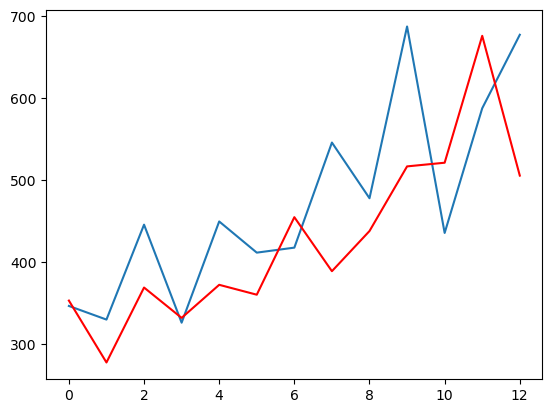

In [3]:
import numpy as np
from sklearn.metrics import mean_squared_error

X = series.values
X = np.nan_to_num(X)
size = int(len(X) * 0.66)
train, test = X[0:size], X[size : len(X)]
history = [x for x in train]
predictinos = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5, 1, 0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictinos.append(yhat)
    obs = test[t]
    history.append(obs)
    print(f"predicted={yhat}, expected={obs}")
error = mean_squared_error(test, predictinos)
print(f"Test MSE: {error}")
plt.plot(test)
plt.plot(predictinos, color="red")
plt.show()